# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Caution:** This notebook was generated automatically by an AI assistant and has not been fully verified. Please interpret all code, results, and visualizations with caution and use at your own risk.

---

[Dandiset on DANDI Archive](https://dandiarchive.org/dandiset/001195/0.250408.1733)

## Overview

This notebook explores the Dandiset "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" (Version 0.250408.1733). The dataset supports research investigating dopamine projections from the dorsal raphe nucleus (DRN) and their relation to behavioral phenotypes like loneliness. It contains data modalities including:

- In vivo calcium imaging and related behavioral videos
- Ex vivo patch-clamp electrophysiology (intracellular and voltage-clamp)

The example analyses here will focus on inspecting the NWB files containing patch-clamp (icephys) recordings, but the principles for browsing and working with data will be similar for other file types.

---

## Notebook Outline

1. **Package requirements**
2. **Connecting to the DANDI Archive and browsing files**
3. **Loading and inspecting an example NWB file**
4. **Exploring the structure of the NWB file**
5. **Visualizing responses to patch-clamp stimuli**
6. **Summary and next steps**

## Package requirements

The following packages are required. It is assumed these are already installed and available in your environment (do not run `pip install` in this notebook):

- `dandi` (for accessing and listing files in DANDI Archive)
- `pynwb`, `h5py`, and `remfile` (for reading NWB files remotely)
- `matplotlib` and `numpy` (for plotting and working with arrays)
- `pandas` (for dataframes)
- `seaborn` (for improved plot aesthetics)

If you encounter an `ImportError` for a package, you’ll need to install it outside of this notebook.

In [1]:
# Import relevant libraries for later use.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()  # Seaborn style for plots

## Connect to DANDI Archive and list some assets

Let’s connect to the DANDI Archive, grab some metadata about this Dandiset, and list a few of its NWB files.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## About the example NWB file

For the remainder of this notebook, we will illustrate analyses using one file to keep things focused. The example file is:

- Path: `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`
- DANDI asset ID: `a243dde4-c270-42a9-8550-025f5ffcd5a7`

Direct download URL:  
`https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/`

You can explore this NWB file interactively on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)

This file contains ex vivo current-clamp and voltage-clamp recordings, stimulus/response pairs, and associated electrophysiology metadata.

## Loading the NWB file (remotely/streaming)

The code below uses [`remfile`](https://github.com/catalystneuro/remfile) to stream the NWB file directly from the remote archive without downloading the full file. Data arrays are only read as needed.

We will inspect some basic session metadata and the structure of stimulus/response data available in the file.

In [3]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, "r")
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print("session_description:", nwb.session_description)
print("file identifier:", nwb.identifier)
print("session_start_time:", nwb.session_start_time)
print("file_create_date:", nwb.file_create_date)
print("experimenter:", nwb.experimenter)
print("lab:", nwb.lab)
print("institution:", nwb.institution)

session_description: episodic stimulation
file identifier: a18b081c-3b63-45df-b702-fc3640aef3de
session_start_time: 2015-03-24 13:41:14-07:00
file_create_date: [datetime.datetime(2025, 4, 3, 16, 56, 47, 408514, tzinfo=tzoffset(None, -25200))]
experimenter: ('Matthews, Gillian',)
lab: Kay Tye Lab
institution: Massachusetts Institute of Technology


## NWB file metadata overview

Basic subject and experimental metadata:

In [4]:
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Date of birth: {subject.date_of_birth}")
print(f"Genotype: {subject.genotype}")
print(f"Description: {subject.description}")

Subject ID: 23
Species: Mus musculus
Sex: F
Date of birth: 2014-05-26 00:00:00-07:00
Genotype: heterozygote
Description: AAV5-DIO-ChR2-eYFP into DRN


### Stimulus and Response Structure (Markdown summary)

The NWB file contains multiple patch-clamp recordings in the form of associated stimulus and response series — typically for episodic runs with incrementing stimulus steps.  

Both current clamp (CC) and voltage clamp (VC) series are present, structured as:

```
/acquisition/
  current_clamp-response-XX-ch-Y
  voltage_clamp-response-XX-ch-Y
/stimulus/
  stimulus-XX-ch-Y
```

Here, `XX` is the episode/trial, and `Y` is the channel (usually 0 or 1).

**Example from this file:**

| Name                       | Type                     | Shape    | Unit   | Description                                    |
|----------------------------|--------------------------|----------|--------|------------------------------------------------|
| current_clamp-response-01-ch-0 | CurrentClampSeries     | (3000,)  | volts  | Response to: episodic stimulation              |
| current_clamp-response-01-ch-1 | CurrentClampSeries     | (3000,)  | volts  | Response to: episodic stimulation              |
| stimulus-01-ch-0           | CurrentClampStimulusSeries | (3000,) | amperes| Stim type: episodic stimulation                |
| stimulus-01-ch-1           | CurrentClampStimulusSeries | (3000,) | amperes| Stim type: episodic stimulation                |

Only a subset is illustrated above; see NWB file with `nwb.acquisition.keys()` and `nwb.stimulus.keys()`.

## Programmatically list available response and stimulus series

The code below lists all keys in the acquisition and stimulus sections. This is useful for quickly browsing the available series.

In [5]:
print("Acquisition series (responses):")
for key in nwb.acquisition:
    print("-", key)
print("\nStimulus series:")
for key in nwb.stimulus:
    print("-", key)

Acquisition series (responses):
- current_clamp-response-01-ch-0
- current_clamp-response-01-ch-1
- current_clamp-response-02-ch-0
- current_clamp-response-02-ch-1
- current_clamp-response-03-ch-0
- current_clamp-response-03-ch-1
- current_clamp-response-04-ch-0
- current_clamp-response-04-ch-1
- current_clamp-response-05-ch-0
- current_clamp-response-05-ch-1
- current_clamp-response-06-ch-0
- current_clamp-response-06-ch-1
- current_clamp-response-07-ch-0
- current_clamp-response-07-ch-1
- current_clamp-response-08-ch-0
- current_clamp-response-08-ch-1
- current_clamp-response-09-ch-0
- current_clamp-response-09-ch-1
- current_clamp-response-10-ch-0
- current_clamp-response-10-ch-1
- current_clamp-response-11-ch-0
- current_clamp-response-11-ch-1
- current_clamp-response-12-ch-0
- current_clamp-response-12-ch-1
- current_clamp-response-13-ch-0
- current_clamp-response-13-ch-1
- current_clamp-response-14-ch-0
- current_clamp-response-14-ch-1
- current_clamp-response-15-ch-0
- current_c

### Inspect a single current clamp response series and its corresponding stimulus

Below we’ll inspect the metadata and visualize the first episode's response and stimulus for channel 0:

- Response: `current_clamp-response-01-ch-0`
- Stimulus: `stimulus-01-ch-0`

Only the first 1000 samples are shown for illustration — these correspond to 0.1 seconds at a 10 kHz sampling rate. Loading small chunks helps avoid excessive network I/O.

In [6]:
resp = nwb.acquisition["current_clamp-response-01-ch-0"]
stim = nwb.stimulus["stimulus-01-ch-0"]

print("Response description:", resp.description)
print("Sampling rate (Hz):", resp.rate)
print("Data shape:", resp.data.shape)
print("Unit:", resp.unit)

print("Stimulus description:", stim.description)
print("Sampling rate (Hz):", stim.rate)
print("Data shape:", stim.data.shape)
print("Unit:", stim.unit)

Response description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
Sampling rate (Hz): 10000.0
Data shape: (3000,)
Unit: volts
Stimulus description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
Sampling rate (Hz): 10000.0
Data shape: (3000,)
Unit: amperes


#### Plot: Response and stimulus trace (first 1000 samples)


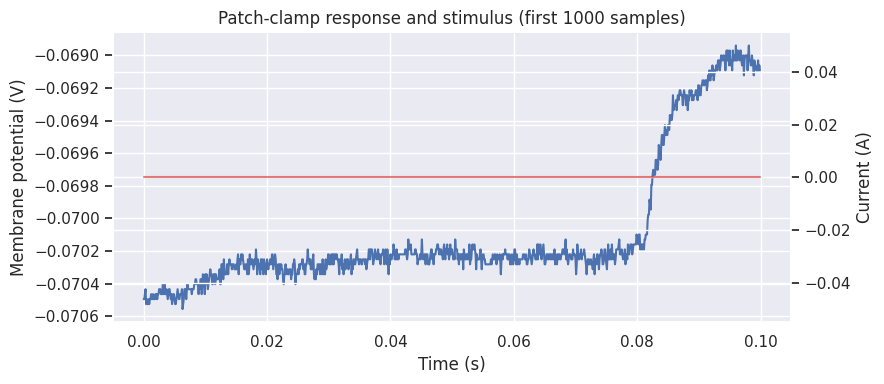

In [7]:
# Load only the first 1000 samples for plotting
n_plot = 1000
resp_data = resp.data[:n_plot] * resp.conversion
stim_data = stim.data[:n_plot] * stim.conversion
t = np.arange(n_plot) / resp.rate

fig, ax1 = plt.subplots(figsize=(9, 4))
ax1.plot(t, resp_data, label="Membrane response (V)")
ax1.set_ylabel("Membrane potential (V)")
ax1.set_xlabel("Time (s)")

ax2 = ax1.twinx()
ax2.plot(t, stim_data, label="Injected current (A)", color="tab:red", alpha=0.6)
ax2.set_ylabel("Current (A)")
plt.title("Patch-clamp response and stimulus (first 1000 samples)")
plt.tight_layout()
plt.show()

### Exploring another episode/channel (example)

It’s often useful to compare responses across stimulus intensities/episodes.
Below is an example visualization for:
- Response: `current_clamp-response-03-ch-1`  
- Stimulus: `stimulus-03-ch-1`

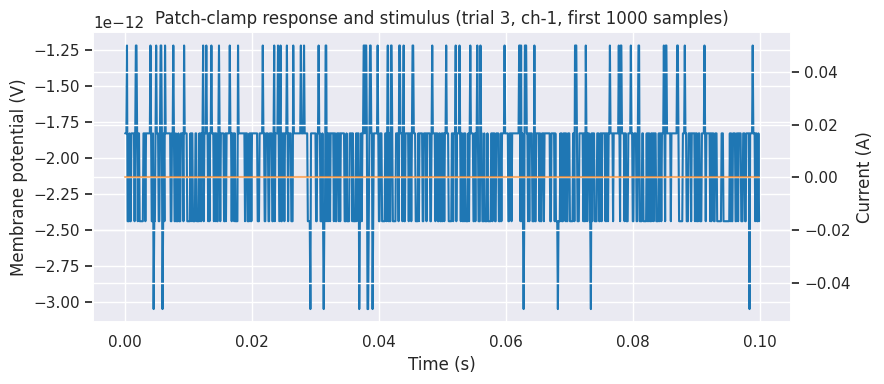

In [8]:
resp2 = nwb.acquisition["current_clamp-response-03-ch-1"]
stim2 = nwb.stimulus["stimulus-03-ch-1"]
n_plot = 1000
resp2_data = resp2.data[:n_plot] * resp2.conversion
stim2_data = stim2.data[:n_plot] * stim2.conversion
t2 = np.arange(n_plot) / resp2.rate

fig, ax1 = plt.subplots(figsize=(9, 4))
ax1.plot(t2, resp2_data, label="Membrane response (ch-1)", color="tab:blue")
ax1.set_ylabel("Membrane potential (V)")
ax1.set_xlabel("Time (s)")

ax2 = ax1.twinx()
ax2.plot(t2, stim2_data, label="Injected current (ch-1)", color="tab:orange", alpha=0.6)
ax2.set_ylabel("Current (A)")
plt.title("Patch-clamp response and stimulus (trial 3, ch-1, first 1000 samples)")
plt.tight_layout()
plt.show()

## Summary and next steps

This notebook has walked through browsing the Dandiset, accessing NWB metadata, examining available episodes, and visualizing patch-clamp data streamed directly from the DANDI Archive.

**Possible directions for further analysis include:**

- Exploring recordings from additional cells or dates.
- Quantifying membrane properties (e.g., input resistance, spike characteristics).
- Comparing voltage- vs. current-clamp responses.
- Cross-referencing imaging or behavioral videos with electrophysiology epochs (may require different files).
- Aggregating data across sweeps/timepoints for group analysis.

More complex analyses will require thoughtful data loading strategies, especially for large files. For detailed protocol and metadata, please refer to the Dandiset page or original publication.

---

For interactive exploration of this file’s data, you can also try [Neurosift Viewer](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)